<a href="https://colab.research.google.com/github/Ravi-Nikam/ML/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Credit Card Fraud detection **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ML/ML_Data_set/Credit card fraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
#checking any null value in data
data.isnull().values.any()

True

In [26]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,142686.000000,142686.000000,142686.000000,142686.000000,142686.000000,142686.000000,142686.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000
mean,52467.147316,-0.249866,0.021475,0.673591,0.137175,-0.282893,0.078072,-0.118122,0.065105,-0.089127,-0.022768,0.208382,0.030940,-0.018766,0.028413,0.229201,-0.008491,0.041905,-0.083812,-0.017128,0.042349,-0.039818,-0.118039,-0.033193,0.011335,0.130821,0.021535,0.000636,0.002207,90.656745,0.001899
std,21132.772484,1.814390,1.610366,1.266182,1.322208,1.304916,1.282313,1.165277,1.233326,1.090355,1.053220,1.048352,1.018780,0.997775,0.918238,0.925329,0.877360,0.885128,0.832183,0.808521,0.719355,0.720754,0.634547,0.589482,0.595664,0.437342,0.492358,0.389189,0.306297,246.361798,0.043540
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38220.000000,-1.021370,-0.559620,0.171460,-0.718073,-0.903666,-0.661817,-0.604765,-0.130507,-0.713023,-0.495894,-0.550015,-0.371099,-0.673527,-0.343542,-0.307235,-0.474992,-0.411813,-0.548735,-0.505628,-0.169678,-0.225821,-0.547348,-0.171807,-0.325702,-0.136000,-0.327190,-0.060116,-0.004211,5.990000,0.000000
50%,54262.000000,-0.272512,0.106478,0.750705,0.164362,-0.315029,-0.177563,-0.064558,0.081087,-0.153461,-0.100438,0.121322,0.168893,-0.020292,0.059256,0.340130,0.069720,-0.023741,-0.083011,-0.017037,-0.026762,-0.059558,-0.094326,-0.045124,0.068363,0.167387,-0.066478,0.012121,0.023614,23.510000,0.000000
75%,70239.000000,1.158444,0.778168,1.363604,0.991310,0.236679,0.462727,0.409170,0.375483,0.487043,0.418901,1.029243,0.654173,0.641757,0.452515,0.897133,0.531139,0.427672,0.388080,0.479457,0.164346,0.113044,0.300427,0.083109,0.408281,0.420155,0.284409,0.087763,0.076986,80.050000,0.000000
max,84876.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [31]:
data.dropna(axis=0,inplace=True)

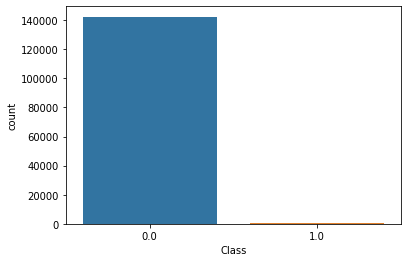

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class',data=data)
plt.show()

In [37]:
Fraud=data[data['Class']==1.0]
Normal=data[data['Class']==0.0]

In [38]:
print(Fraud.shape,Normal.shape)

(271, 31) (142414, 31)


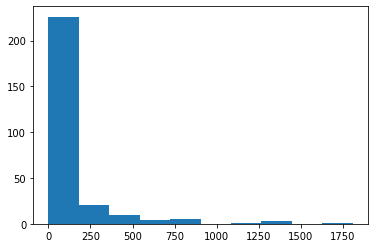

In [44]:
plt.hist(x=Fraud.Amount)
plt.show()

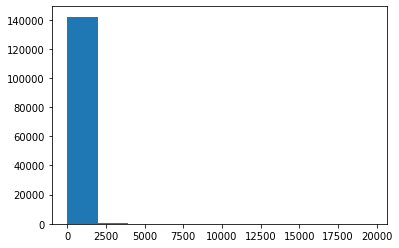

In [45]:
plt.hist(x=Normal.Amount)
plt.show()

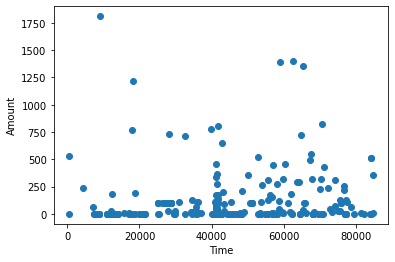

In [51]:
plt.scatter(x=Fraud.Time,y=Fraud.Amount)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

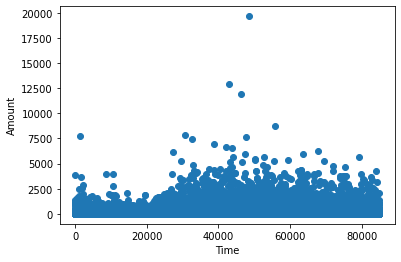

In [53]:
plt.scatter(x=Normal.Time,y=Normal.Amount)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [57]:
print('Fraud case',len(data[data['Class']==1]))
print('Normal case',len(data[data['Class']==0]))

Fraud case 271
Normal case 142414


In [60]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [61]:
x=data.drop(['Class'],axis=1)

In [62]:
y=data['Class']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rnn=RandomForestClassifier(n_estimators=30,random_state=0)
rnn.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
y_pre=rnn.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pre)
print(accuracy*100)

99.9551468939224


In [82]:
from sklearn.metrics import confusion_matrix
cnm=confusion_matrix(y_test,y_pre)
print(cnm)

[[35594     2]
 [   14    62]]


In [80]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pre)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35596
         1.0       0.97      0.82      0.89        76

    accuracy                           1.00     35672
   macro avg       0.98      0.91      0.94     35672
weighted avg       1.00      1.00      1.00     35672

